# Pandas introduction pt2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

## Read excel

In [3]:
VP_0 = pd.read_excel('../data_example/VP_0.xls')


In [4]:
VP_0.head()

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
0,50,289.376111,289.376111,290.575118,291.174581,291.515100,291.733607,291.898818,292.056090,292.284635,...,293.589032,293.584915,293.581635,293.583390,293.588737,293.595974,293.605148,293.611802,293.629430,293.644078
1,100,287.901449,287.901449,288.575860,289.058297,289.797472,290.798329,291.656605,292.250442,292.598401,...,292.904840,292.953306,293.004116,293.054238,293.098271,293.133411,293.160647,293.188356,293.206350,293.231139
2,150,287.948612,287.948612,288.415667,288.755772,289.031504,289.284695,289.547629,289.842949,290.188918,...,291.590653,292.061341,292.422399,292.651971,292.776545,292.842487,292.886851,292.932896,292.970032,293.016734
3,200,287.592819,287.592819,287.918203,288.210424,288.489569,288.749405,289.007951,289.305117,289.695596,...,291.425171,291.919330,292.281324,292.504363,292.618280,292.677838,292.722651,292.768211,292.816206,292.870071
4,250,286.258222,286.258222,286.987976,287.594413,287.985362,288.266699,288.499115,288.742149,289.081378,...,290.925270,291.507675,291.960919,292.261082,292.425151,292.510575,292.569019,292.619213,292.680676,292.743178


#### to read a xls file you must install some libraries
conda install -c anaconda xlrd 
#### or
conda install -c anaconda openpyxl


In [6]:
VP_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,100.0,2525.000000,1450.574599,50.000000,1287.500000,2525.000000,3762.500000,5000.000000
Probe 1,100.0,281.839057,1.960932,278.947433,280.836111,281.427994,282.236856,289.376111
Probe 2,100.0,281.839057,1.960932,278.947433,280.836111,281.427994,282.236856,289.376111
Probe 3,100.0,282.370682,1.927571,280.059285,281.328314,281.839689,282.541269,290.575118
Probe 4,100.0,282.826708,1.901521,280.453923,281.763463,282.192104,282.985121,291.174581
Probe 5,100.0,283.236591,1.880251,281.225892,282.223479,282.520303,283.238620,291.515100
Probe 6,100.0,283.609673,1.867328,281.859219,282.662369,282.881864,283.501267,291.733607
Probe 7,100.0,283.946638,1.858506,282.201623,283.029520,283.205617,283.900152,291.898818
Probe 8,100.0,284.255495,1.849069,282.559461,283.331851,283.472959,284.184786,292.250442
Probe 9,100.0,284.545696,1.843800,282.929516,283.609442,283.748334,284.440377,292.598401


In [7]:
VP_0.head()

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
0,50,289.376111,289.376111,290.575118,291.174581,291.515100,291.733607,291.898818,292.056090,292.284635,...,293.589032,293.584915,293.581635,293.583390,293.588737,293.595974,293.605148,293.611802,293.629430,293.644078
1,100,287.901449,287.901449,288.575860,289.058297,289.797472,290.798329,291.656605,292.250442,292.598401,...,292.904840,292.953306,293.004116,293.054238,293.098271,293.133411,293.160647,293.188356,293.206350,293.231139
2,150,287.948612,287.948612,288.415667,288.755772,289.031504,289.284695,289.547629,289.842949,290.188918,...,291.590653,292.061341,292.422399,292.651971,292.776545,292.842487,292.886851,292.932896,292.970032,293.016734
3,200,287.592819,287.592819,287.918203,288.210424,288.489569,288.749405,289.007951,289.305117,289.695596,...,291.425171,291.919330,292.281324,292.504363,292.618280,292.677838,292.722651,292.768211,292.816206,292.870071
4,250,286.258222,286.258222,286.987976,287.594413,287.985362,288.266699,288.499115,288.742149,289.081378,...,290.925270,291.507675,291.960919,292.261082,292.425151,292.510575,292.569019,292.619213,292.680676,292.743178


In [8]:
for col in VP_0.columns:
    print(col)

Time
Probe 1
Probe 2
Probe 3
Probe 4
Probe 5
Probe 6
Probe 7
Probe 8
Probe 9
Probe 10
Probe 11
Probe 12
Probe 13
Probe 14
Probe 15
Probe 16
Probe 17
Probe 18
Probe 19
Probe 20
Probe 21


In [9]:
c_list = VP_0.columns
c_list[1:]

Index(['Probe 1', 'Probe 2', 'Probe 3', 'Probe 4', 'Probe 5', 'Probe 6',
       'Probe 7', 'Probe 8', 'Probe 9', 'Probe 10', 'Probe 11', 'Probe 12',
       'Probe 13', 'Probe 14', 'Probe 15', 'Probe 16', 'Probe 17', 'Probe 18',
       'Probe 19', 'Probe 20', 'Probe 21'],
      dtype='object')

In [10]:
VP_0[c_list[1:]].var()
    

Probe 1     3.845253
Probe 2     3.845253
Probe 3     3.715531
Probe 4     3.615784
Probe 5     3.535343
Probe 6     3.486915
Probe 7     3.454044
Probe 8     3.419058
Probe 9     3.399598
Probe 10    3.513578
Probe 11    3.641781
Probe 12    3.756606
Probe 13    3.896555
Probe 14    4.050264
Probe 15    4.224088
Probe 16    4.439977
Probe 17    4.721907
Probe 18    5.060548
Probe 19    5.231241
Probe 20    4.311432
Probe 21    2.612569
dtype: float64

In [11]:
VP_0.agg(['std', 'sum', 'mean', 'median', 'var'])

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
std,1.450575e+03,1.960932,1.960932,1.927571,1.901521,1.880251,1.867328,1.858506,1.849069,1.843800,...,1.938197,1.973969,2.012527,2.055259,2.107125,2.172995,2.249566,2.287191,2.076399,1.616344
sum,2.525000e+05,28183.905719,28183.905719,28237.068167,28282.670812,28323.659106,28360.967278,28394.663801,28425.549510,28454.569621,...,28533.494524,28557.835536,28581.682207,28604.204192,28624.772630,28644.187914,28665.986933,28702.385833,28787.841676,28909.959325
mean,2.525000e+03,281.839057,281.839057,282.370682,282.826708,283.236591,283.609673,283.946638,284.255495,284.545696,...,285.334945,285.578355,285.816822,286.042042,286.247726,286.441879,286.659869,287.023858,287.878417,289.099593
median,2.525000e+03,281.427994,281.427994,281.839689,282.192104,282.520303,282.881864,283.205617,283.472959,283.748334,...,284.486797,284.722081,284.935910,285.142718,285.315494,285.451338,285.573308,285.822354,286.710981,288.159567
var,2.104167e+06,3.845253,3.845253,3.715531,3.615784,3.535343,3.486915,3.454044,3.419058,3.399598,...,3.756606,3.896555,4.050264,4.224088,4.439977,4.721907,5.060548,5.231241,4.311432,2.612569


C:\Users\ferra\AppData\Local\Temp/ipykernel_8908/84754593.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


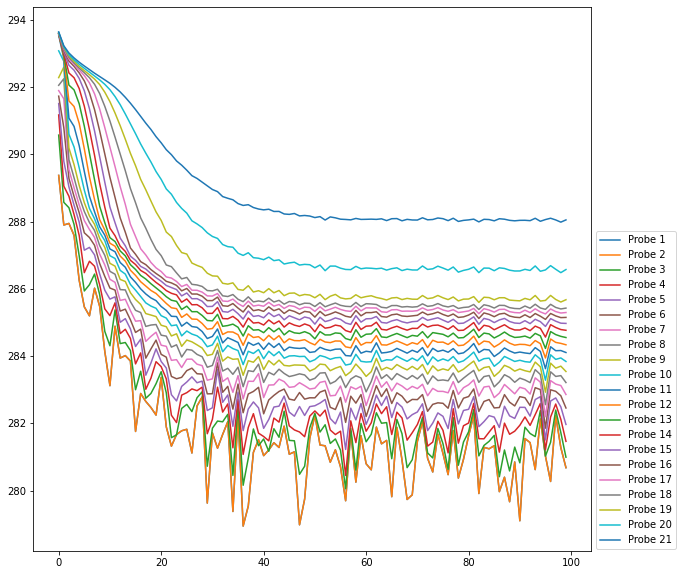

In [36]:
fig, ax = plt.subplots(figsize=(10,10))

ax = plt.plot(VP_0.index, VP_0.iloc[:, 1:] )
fig.legend(c_list[1:], bbox_to_anchor=(.9,.12), loc="lower left")

fig.show()

C:\Users\ferra\AppData\Local\Temp/ipykernel_8908/1911919354.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


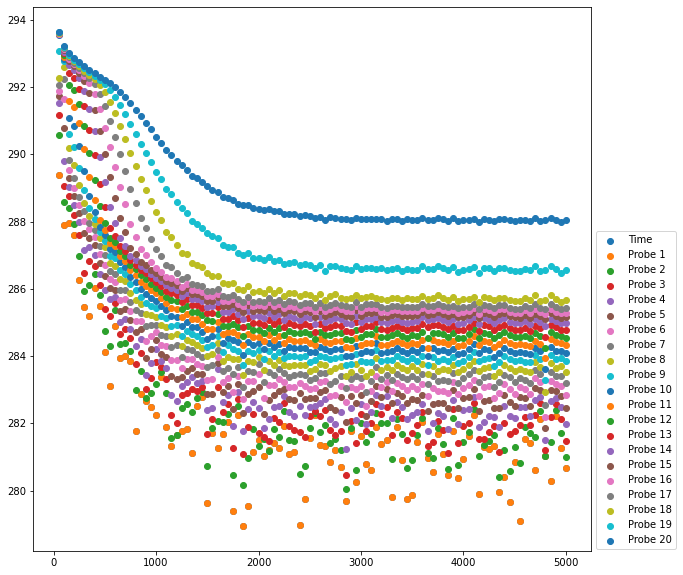

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_aspect('equal')
for col in c_list[1:]:
    ax = plt.scatter(VP_0.loc[:,['Time']], VP_0[col] )
fig.legend(VP_0.columns, bbox_to_anchor=(.9,.12), loc="lower left")
fig.show()

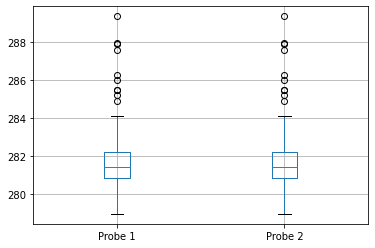

In [15]:
boxplot = VP_0.boxplot(['Probe 1', 'Probe 2'])



In [20]:
VP_temp = VP_0.drop('Time', axis =1)

In [21]:
VP_temp

,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,Probe 10,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
0,289.376111,289.376111,290.575118,291.174581,291.515100,291.733607,291.898818,292.056090,292.284635,293.081948,...,293.589032,293.584915,293.581635,293.583390,293.588737,293.595974,293.605148,293.611802,293.629430,293.644078
1,287.901449,287.901449,288.575860,289.058297,289.797472,290.798329,291.656605,292.250442,292.598401,292.769993,...,292.904840,292.953306,293.004116,293.054238,293.098271,293.133411,293.160647,293.188356,293.206350,293.231139
2,287.948612,287.948612,288.415667,288.755772,289.031504,289.284695,289.547629,289.842949,290.188918,290.600484,...,291.590653,292.061341,292.422399,292.651971,292.776545,292.842487,292.886851,292.932896,292.970032,293.016734
3,287.592819,287.592819,287.918203,288.210424,288.489569,288.749405,289.007951,289.305117,289.695596,290.221731,...,291.425171,291.919330,292.281324,292.504363,292.618280,292.677838,292.722651,292.768211,292.816206,292.870071
4,286.258222,286.258222,286.987976,287.594413,287.985362,288.266699,288.499115,288.742149,289.081378,289.603776,...,290.925270,291.507675,291.960919,292.261082,292.425151,292.510575,292.569019,292.619213,292.680676,292.743178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,281.025624,281.025624,281.029778,281.216461,281.511131,281.859219,282.201623,282.559461,282.929516,283.285842,...,283.946968,284.230365,284.568295,284.885343,285.094819,285.256668,285.393427,285.658707,286.565653,288.063713
96,280.274595,280.274595,281.441081,282.191191,282.666607,283.001420,283.274046,283.535529,283.792279,284.041241,...,284.510920,284.732459,284.936955,285.117296,285.270841,285.404000,285.542684,285.806831,286.692762,288.102639
97,282.234974,282.234974,282.398670,282.577515,282.759164,282.954830,283.170102,283.397890,283.644723,283.905407,...,284.410728,284.642299,284.853669,285.040852,285.197568,285.326320,285.450449,285.687292,286.585022,288.052292
98,281.280343,281.280343,281.726138,282.122516,282.491944,282.823437,283.127568,283.422207,283.703699,283.947818,...,284.381430,284.590013,284.792321,284.981639,285.147491,285.284134,285.404786,285.611075,286.484717,287.986741


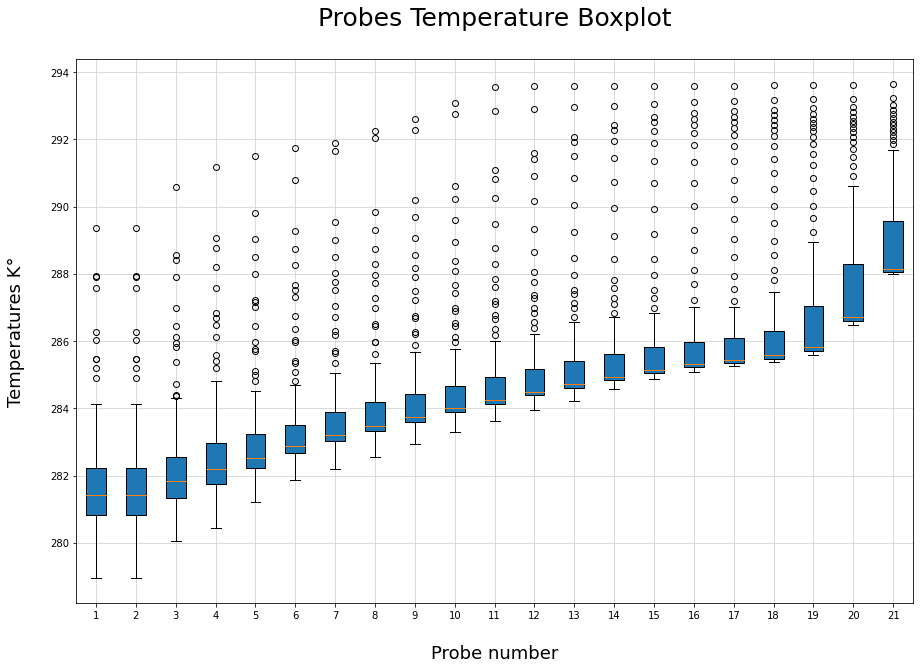

In [25]:
fig, ax = plt.subplots(figsize=(15,10))

plt.title("Probes Temperature Boxplot\n", fontsize=25)

plt.xlabel('\nProbe number', fontsize=18)
plt.ylabel('Temperatures K°\n', fontsize=18)

plt.grid(axis='y', color='lightgrey')
plt.grid(axis='x', color='lightgrey')

ax.boxplot(VP_temp, patch_artist=True)
#ax.set_xticklabels(labels =c_list[1:],  rotation=90)
#plt.xticks(rotation=90)

# make sure you have a output folder created
plt.savefig( './output/boxplot' + '.png', format ='png',  bbox_inches='tight')
plt.show()